In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import random
import collections
from torch.utils.tensorboard import SummaryWriter

In [3]:
logs_path = '/content/drive/MyDrive/Colab Notebooks/Predict Next Word/LSTM/rnn_words'  # Đường dẫn để lưu trữ các dữ liệu summary của PyTorch
writer = SummaryWriter(logs_path)  # Tạo một đối tượng SummaryWriter với đường dẫn đã cho

In [4]:
training_file = '/content/drive/MyDrive/Colab Notebooks/Predict Next Word/LSTM/training.txt'

In [5]:
def read_data(fname):
  with open(fname) as f:
    content = f.readlines()
  #Tách từ
  content = [x.strip() for x in content]
  content = content = [word for i in range(len(content)) for word in content[i].split()]
  return content

training_data = read_data(training_file)
print("Training data: ",training_data)
# List các ký tự muốn loại bỏ
chars_to_remove = [',', '.', '?','the','and']

# Loại bỏ các ký tự từ training_data
for char in chars_to_remove:
    training_data = [text for text in training_data if text != char]

print("Training data: ",training_data)
print(training_data[0])

Training data:  ['fifth', 'dominion', 'seed', 'unto', 'own', 'heaven', 'us', 'rule', 'make', 'fifth', 'said', 'and', 'all', "don't", 'dominion', 'gathered', 'lights', 'also', 'forth', 'is', 'fifth', "she'd", "won't", 'life', 'beginning', 'evening', 'herb', 'abundantly', 'sixth', 'divided', 'blessed', "isn't", 'itself', 'days', 'god', 'good', 'female', 'our', 'be', 'that', 'own', 'over', "can't", 'light', 'divide', 'midst', 'was', 'give', "don't", 'also', 'seed', 'that', 'multiply', 'creeping', 'face', 'i', 'their', "don't", 'is', 'beast', 'their', 'darkness', 'tree', 'whose', 'day', 'fruit', 'appear', 'i', 'saw', 'land', 'air', 'midst', 'appear', 'firmament', 'shall', 'good', 'given', 'upon', 'sea', 'subdue', 'without', 'said', 'let', 'sea', 'lesser', 'called', 'sea', 'moved', 'morning', 'good', 'likeness', 'form', 'for', 'made', 'over', 'them', 'that', 'him', 'beast', 'great', 'make', 'evening', 'kind', 'to', 'very', 'bearing', 'lesser', 'place', 'of', 'thing', 'whose', 'rule', "they'

In [6]:
#create a dictonary of words - Tạo từ điển
def build_dataset(words):
    count = collections.Counter(words).most_common()
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return dictionary, reverse_dictionary

dictionary, reverse_dictionary = build_dataset(training_data)
vocab_size = len(dictionary)
print(dictionary)
print(dictionary['to'])

{'female': 0, 'firmament': 1, 'our': 2, 'days': 3, 'over': 4, 'created': 5, "you'll": 6, 'it': 7, 'fill': 8, 'sixth': 9, 'yielding': 10, 'meat': 11, 'also': 12, 'two': 13, 'us': 14, 'dry': 15, 'which': 16, 'creeping': 17, 'tree': 18, 'moveth': 19, 'may': 20, 'moved': 21, 'from': 22, 'moving': 23, 'spirit': 24, 'under': 25, 'beast': 26, 'dominion': 27, 'lights': 28, 'subdue': 29, 'replenish': 30, 'fly': 31, 'good': 32, 'i': 33, "they're": 34, 'second': 35, 'air': 36, 'fourth': 37, 'every': 38, 'forth': 39, 'is': 40, 'blessed': 41, 'thing': 42, 'fruitful': 43, 'a': 44, 'was': 45, 'given': 46, 'brought': 47, 'their': 48, 'fowl': 49, 'one': 50, 'earth': 51, 'grass': 52, 'fish': 53, 'had': 54, 'divided': 55, 'seas': 56, "you're": 57, 'living': 58, 'hath': 59, 'male': 60, 'own': 61, 'said': 62, "don't": 63, 'made': 64, 'gathering': 65, 'upon': 66, 'place': 67, 'winged': 68, 'were': 69, 'behold': 70, 'make': 71, 'whose': 72, 'morning': 73, 'evening': 74, 'third': 75, 'so': 76, 'rule': 77, 'la

In [7]:
#length of the sequence to train
train_len = 3
#converting the data into required sequence
text_sequences = []
for i in range(train_len,len(training_data)+1):
  seq = training_data[i-train_len:i]
  text_sequences.append(seq)
print(text_sequences)

[['fifth', 'dominion', 'seed'], ['dominion', 'seed', 'unto'], ['seed', 'unto', 'own'], ['unto', 'own', 'heaven'], ['own', 'heaven', 'us'], ['heaven', 'us', 'rule'], ['us', 'rule', 'make'], ['rule', 'make', 'fifth'], ['make', 'fifth', 'said'], ['fifth', 'said', 'all'], ['said', 'all', "don't"], ['all', "don't", 'dominion'], ["don't", 'dominion', 'gathered'], ['dominion', 'gathered', 'lights'], ['gathered', 'lights', 'also'], ['lights', 'also', 'forth'], ['also', 'forth', 'is'], ['forth', 'is', 'fifth'], ['is', 'fifth', "she'd"], ['fifth', "she'd", "won't"], ["she'd", "won't", 'life'], ["won't", 'life', 'beginning'], ['life', 'beginning', 'evening'], ['beginning', 'evening', 'herb'], ['evening', 'herb', 'abundantly'], ['herb', 'abundantly', 'sixth'], ['abundantly', 'sixth', 'divided'], ['sixth', 'divided', 'blessed'], ['divided', 'blessed', "isn't"], ['blessed', "isn't", 'itself'], ["isn't", 'itself', 'days'], ['itself', 'days', 'god'], ['days', 'god', 'good'], ['god', 'good', 'female'],

In [8]:
sequences=[]
for text in text_sequences:
  for i in range(3):
    text[i]=dictionary[text[i]]
  sequences.append(text)


In [9]:
sequences

[[152, 27, 127],
 [27, 127, 82],
 [127, 82, 61],
 [82, 61, 95],
 [61, 95, 14],
 [95, 14, 77],
 [14, 77, 71],
 [77, 71, 152],
 [71, 152, 62],
 [152, 62, 98],
 [62, 98, 63],
 [98, 63, 27],
 [63, 27, 91],
 [27, 91, 28],
 [91, 28, 12],
 [28, 12, 39],
 [12, 39, 40],
 [39, 40, 152],
 [40, 152, 114],
 [152, 114, 137],
 [114, 137, 128],
 [137, 128, 115],
 [128, 115, 74],
 [115, 74, 138],
 [74, 138, 83],
 [138, 83, 9],
 [83, 9, 55],
 [9, 55, 41],
 [55, 41, 107],
 [41, 107, 92],
 [107, 92, 3],
 [92, 3, 148],
 [3, 148, 32],
 [148, 32, 0],
 [32, 0, 2],
 [0, 2, 119],
 [2, 119, 120],
 [119, 120, 61],
 [120, 61, 4],
 [61, 4, 102],
 [4, 102, 144],
 [102, 144, 121],
 [144, 121, 154],
 [121, 154, 45],
 [154, 45, 87],
 [45, 87, 63],
 [87, 63, 12],
 [63, 12, 127],
 [12, 127, 120],
 [127, 120, 99],
 [120, 99, 17],
 [99, 17, 116],
 [17, 116, 33],
 [116, 33, 48],
 [33, 48, 63],
 [48, 63, 40],
 [63, 40, 26],
 [40, 26, 48],
 [26, 48, 111],
 [48, 111, 18],
 [111, 18, 72],
 [18, 72, 84],
 [72, 84, 93],
 [84, 93,

In [10]:
sequences=np.asarray(sequences)

In [11]:
sequences

array([[152,  27, 127],
       [ 27, 127,  82],
       [127,  82,  61],
       ...,
       [  8,   2,  69],
       [  2,  69,  82],
       [ 69,  82,  30]])

In [12]:
vocabulary_size = len(dictionary)+1
vocabulary_size

158

In [13]:
#trainX
train_inputs=sequences[:,:-1]

In [14]:
train_inputs

array([[152,  27],
       [ 27, 127],
       [127,  82],
       ...,
       [  8,   2],
       [  2,  69],
       [ 69,  82]])

In [15]:
#input sequence length
seq_length=train_inputs.shape[1]
seq_length

2

In [16]:
#trainY
train_targets=sequences[:,-1]

In [17]:
train_targets

array([127,  82,  61, ...,  69,  82,  30])

In [18]:
from keras.utils import to_categorical
#one hot encoding
train_targets = to_categorical(train_targets, num_classes=vocabulary_size)

In [19]:
train_targets

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**BUILD MODEL**


In [20]:
#required libraries
import torch
from torch.optim import Adam
import torch.nn as nn

In [21]:
#lstm model
class lstm(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):  #Init - define function
        super().__init__()
        #simple lookup table that stores embeddings of a fixed dictionary and size.
        self.embed = nn.Embedding(vocab_size, embed_size) #Embed Word to Vector

        #lstm
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=2, bidirectional=False)

        #fully connected layer
        self.linear = nn.Linear(hidden_size*seq_length,vocab_size)

    def forward(self, input_word):
        #input sequence to embeddings
        embedded = self.embed(input_word)

        #passing the embedding to lstm model
        output, hidden = self.lstm(embedded)

        #reshaping
        output=output.view(output.size(0), -1)

        #fully connected layer
        output = self.linear(output)
        return output,hidden

In [22]:
model=lstm(vocab_size=vocabulary_size,embed_size=128, hidden_size=512)

In [23]:
#Adam optimizer
optimizer= Adam(model.parameters(), lr=0.01)

#loss
criterion = nn.BCEWithLogitsLoss()  #Binary cross entropy

In [24]:
#training the model
def train(epoch):
    #set the model to train
    model.train()
    tr_loss=0

    #clearing the Gradients
    optimizer.zero_grad()

    #predict the output
    y_pred, (state_h, state_c) = model(torch.from_numpy(train_inputs))

    #compute the loss
    loss=criterion(y_pred,torch.from_numpy(train_targets))
    losses.append(loss)

    #backpropagate
    loss.backward()

    #update the parameters
    optimizer.step()
    tr_loss = loss.item()

    print("Epoch : ",epoch,"loss : ",loss)

In [25]:
#number of epoch
no_epoch=10
losses=[]
for epoch in range(1,no_epoch+1):
    train(epoch)

Epoch :  1 loss :  tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  2 loss :  tensor(0.0493, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  3 loss :  tensor(0.0590, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  4 loss :  tensor(0.0695, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  5 loss :  tensor(0.0712, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  6 loss :  tensor(0.0678, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  7 loss :  tensor(0.0624, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  8 loss :  tensor(0.0577, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  9 loss :  tensor(0.0547, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  10 loss :  tensor(0.0516, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


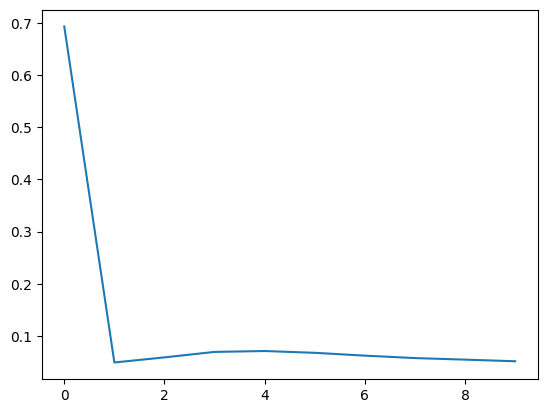

In [26]:
import torch
import matplotlib.pyplot as plt

# Chuyển danh sách `losses` thành một tensor PyTorch
losses_tensor = torch.tensor(losses)

# Tách tensor trước khi vẽ đồ thị
plt.plot(losses_tensor.detach().numpy(), label='Mất mát trong quá trình huấn luyện')

plt.show()


**Prediction**

In [27]:
def predict_next_word(text):
    #set the model to evaluation
    model.eval()

    #preprocess
    text = text.lower().strip()
    print(text)

    # Tách các từ ra khỏi văn bản
    input_tokens = text.split()

    # In ra các từ token
    print(input_tokens)


    #converting the tokens to integer sequence
    sequences = []
    for w in input_tokens:
      sequences.append(dictionary[w])
    print(sequences)
    sequences = [sequences]
    #converting to array
    sequences=np.array(sequences)
    print(sequences)
    with torch.no_grad():
        #converting to tensor
        sequences=torch.from_numpy(sequences)
        #predicting the output
        predict,(hidden,cell)=model(sequences)

    #applying the softmax layer
    softmax = torch.exp(predict)
    prob = list(softmax.numpy())

    #index of the predict word
    predictions = np.argmax(prob)

    #converting the sequence back to word
    next_word = reverse_dictionary[predictions]
    return next_word

In [ ]:
predict_next_word("there is")

there is
['there', 'is']
[110, 40]
[[110  40]]


'forth'

In [28]:
with open("/content/drive/MyDrive/Colab Notebooks/Predict Next Word/LSTM/predict.txt", "w") as file:
    for i in range(5):  #Lặp 5 lần
        # Viết nội dung vào tệp
        input_text = input()
        file.write(input_text + '\n')
        out = input_text +' '+ predict_next_word(input_text)
        file.write(out + '\n')
        print (out)

life beginning
life beginning
['life', 'beginning']
[128, 115]
[[128 115]]
life beginning grass
good male
good male
['good', 'male']
[32, 60]
[[32 60]]
good male grass
living seas
living seas
['living', 'seas']
[58, 56]
[[58 56]]
living seas thing
night is
night is
['night', 'is']
[108, 40]
[[108  40]]
night is upon
their fruit
their fruit
['their', 'fruit']
[48, 93]
[[48 93]]
their fruit thing
